# Classification model to predict fire or not fire

## Import the libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
sns.set()
warnings.filterwarnings("ignore")

%matplotlib inline

## Clean and preprare the data

In [5]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE.csv", header=1)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [6]:
df.drop(index=[122,123], inplace=True) # removing rows
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df.loc[:122, 'region'] = 'bejaia'
df.loc[122:, 'region'] = 'Sidi-Bel Abbes'

# make date time column
df['date'] = pd.to_datetime(df[['day','month','year']])
df.drop(['day', 'month', 'year'], axis=1, inplace=True)
df.head()

# stripping column names
df.columns = [i.strip() for i in df.columns] 

# stripping Classes feature
df.Classes = df.Classes.str.strip()

# replacing nan and null string with object
df.replace('nan', np.nan) 
df.replace('null', np.nan)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,bejaia,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,bejaia,2012-06-04
4,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,bejaia,2012-06-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,Sidi-Bel Abbes,2012-09-26
240,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,Sidi-Bel Abbes,2012-09-27
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,Sidi-Bel Abbes,2012-09-28
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,Sidi-Bel Abbes,2012-09-29


In [8]:
# check for null value in dataset

df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
region         0
date           0
dtype: int64

In [9]:
# handle null value

df[df.isnull().any(axis=1)]

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
165,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,Sidi-Bel Abbes,2012-07-14


In [10]:
df.loc[165,'DC'] = 14.6
df.loc[165,'ISI'] = 9
df.loc[165,'BUI'] = 12.5
df.loc[165,'FWI'] = 10.4
df.loc[165,'Classes'] = 'fire'

In [12]:
# check null value

df.isnull().sum()

Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
date           0
dtype: int64

In [13]:
# changing dtypes to numerical

df = df.astype({'RH':np.int64, 'Temperature':np.int64, 'Ws':np.int64, 'Rain':np.float64, 'FFMC':np.float64
               ,'DMC':np.float64, 'DC':np.float64, 'ISI':np.float64, 'BUI':np.float64,
               'FWI':np.float64})

In [14]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,bejaia,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,bejaia,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,bejaia,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,bejaia,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,bejaia,2012-06-05


## preprocessing of data

### Encoding categorical features

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Temperature  244 non-null    int64         
 1   RH           244 non-null    int64         
 2   Ws           244 non-null    int64         
 3   Rain         244 non-null    float64       
 4   FFMC         244 non-null    float64       
 5   DMC          244 non-null    float64       
 6   DC           244 non-null    float64       
 7   ISI          244 non-null    float64       
 8   BUI          244 non-null    float64       
 9   FWI          244 non-null    float64       
 10  Classes      244 non-null    object        
 11  region       244 non-null    object        
 12  date         244 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(7), int64(3), object(2)
memory usage: 24.9+ KB


In [16]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Classes'] = encoder.fit_transform(df.Classes)
df['region'] = encoder.fit_transform(df.region)
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region,date
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1,2012-06-01
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1,2012-06-02
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,1,2012-06-03
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,1,2012-06-04
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1,2012-06-05


### Checking and handeling outliers

In [26]:
df.drop('date', axis=1, inplace=True)

In [27]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1


In [29]:
num_cols = [i for i in df.columns if df[i].dtype != 'O']
cat_cols = [i for i in df.columns if df[i].dtype == 'O']
df_cat = df[cat_cols]
df_num = df[num_cols]

In [30]:
df_cat.head()

""
0
1
2
3
4


In [32]:
df_num.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1


In [33]:
df_num.drop(['region', 'Classes'], axis=1, inplace=True)

In [34]:
df_num.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5


### detecting outlier using boxplot

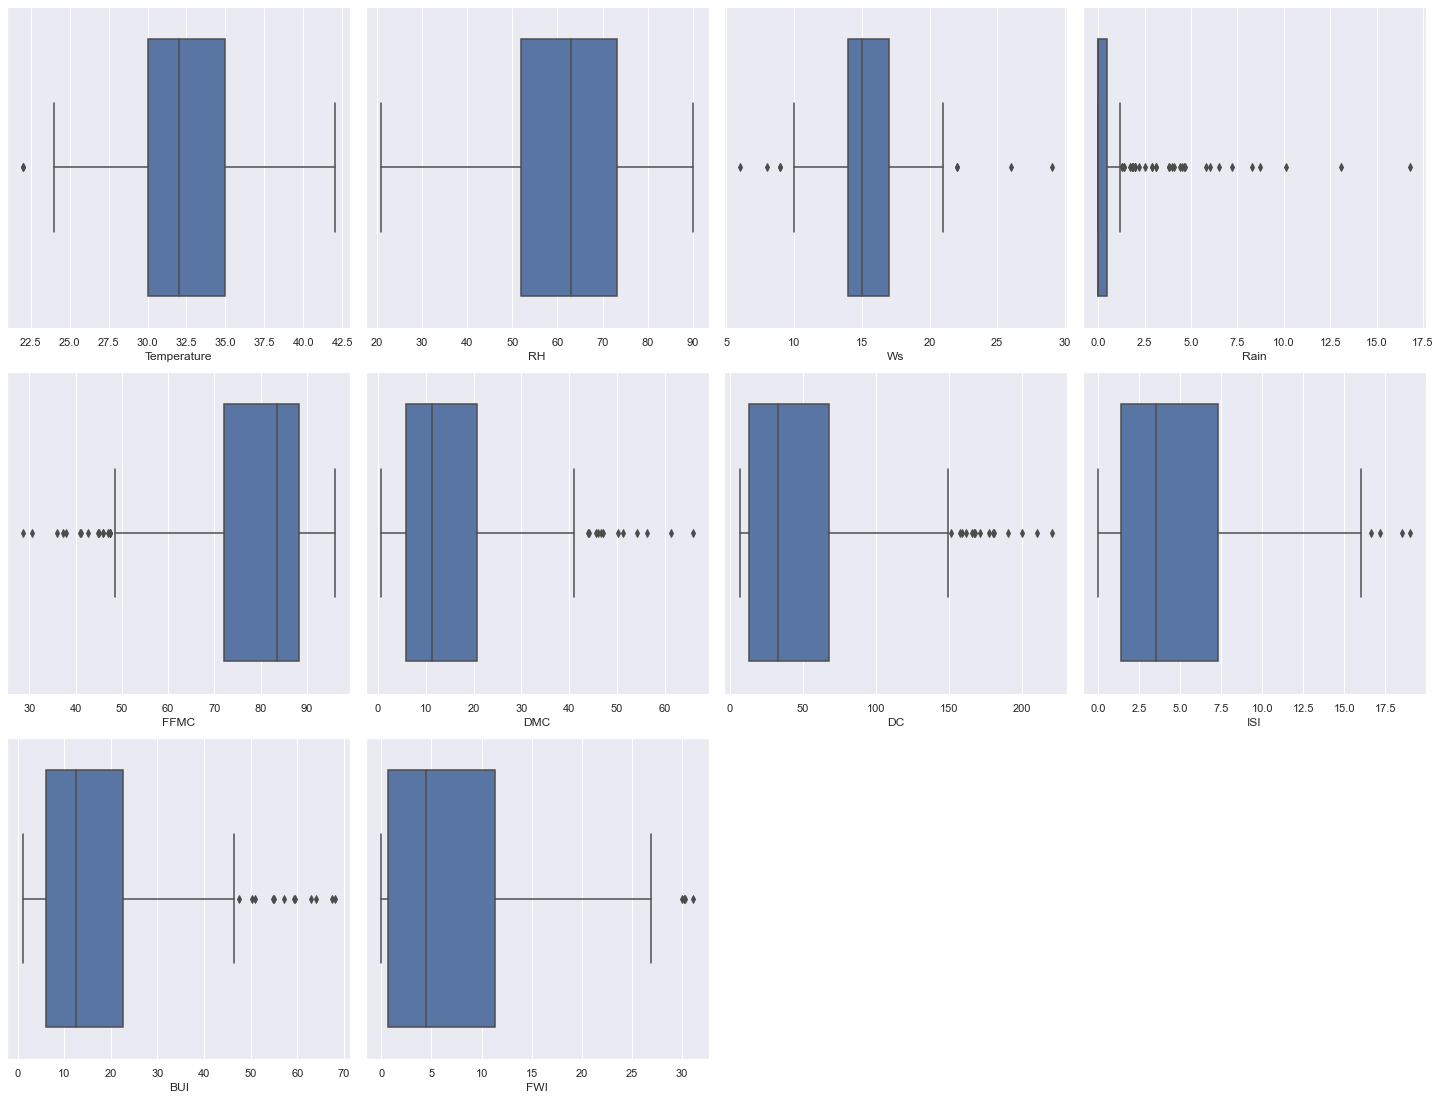

In [36]:
# checking outliers using boxplot

rows = 4
cols = 4
fig = plt.figure(figsize=(cols*5, rows*5))

for i, col in enumerate(df_num.columns):
    ax= fig.add_subplot(rows,cols,i+1)
    sns.boxplot(x =col, data=df)
fig.tight_layout()
plt.show()

### Checking outlier using z score

In [23]:
# Function which will return the outliers from data

def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers

In [37]:
# checking number of outliers in Rain feature using Z score

Rain_outliers = detect_outliers_zscore(df.Rain)
print("Outliers from Z-scores method: ", str(Rain_outliers[0:30]) + ".....")
print("number of outliers", len(Rain_outliers))

Outliers from Z-scores method:  [13.1, 16.8, 7.2, 10.1, 8.3, 8.7].....
number of outliers 6


In [38]:
# checking number of outliers in Rain feature using Z score

FFMC_outliers = detect_outliers_zscore(df.FFMC)
print("Outliers from Z-scores method: ", str(FFMC_outliers[0:30]) + ".....")
print("number of outliers", len(FFMC_outliers))

Outliers from Z-scores method:  [28.6, 30.5].....
number of outliers 2


### Trimming/removing outliers

In [42]:
def outlier_index_zscore(data):
    z = np.abs(stats.zscore(data))
    return np.where(z > 3)

In [50]:
indexes = np.concatenate([outlier_index_zscore(df.Rain)[0], outlier_index_zscore(df.FFMC)[0] , outlier_index_zscore(df.DMC)[0], 
                          outlier_index_zscore(df.DC)[0], outlier_index_zscore(df.BUI)[0]])

In [51]:
indexes

array([  2,  91,  92,  93, 105, 139,   3,  93,  89, 207, 208, 209,  87,
        88,  89,  87,  88,  89, 207, 208, 209], dtype=int64)

In [53]:
trim_df = df.loc[set(df.index) - set(indexes)]

In [55]:
trim_df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0,1
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0,1


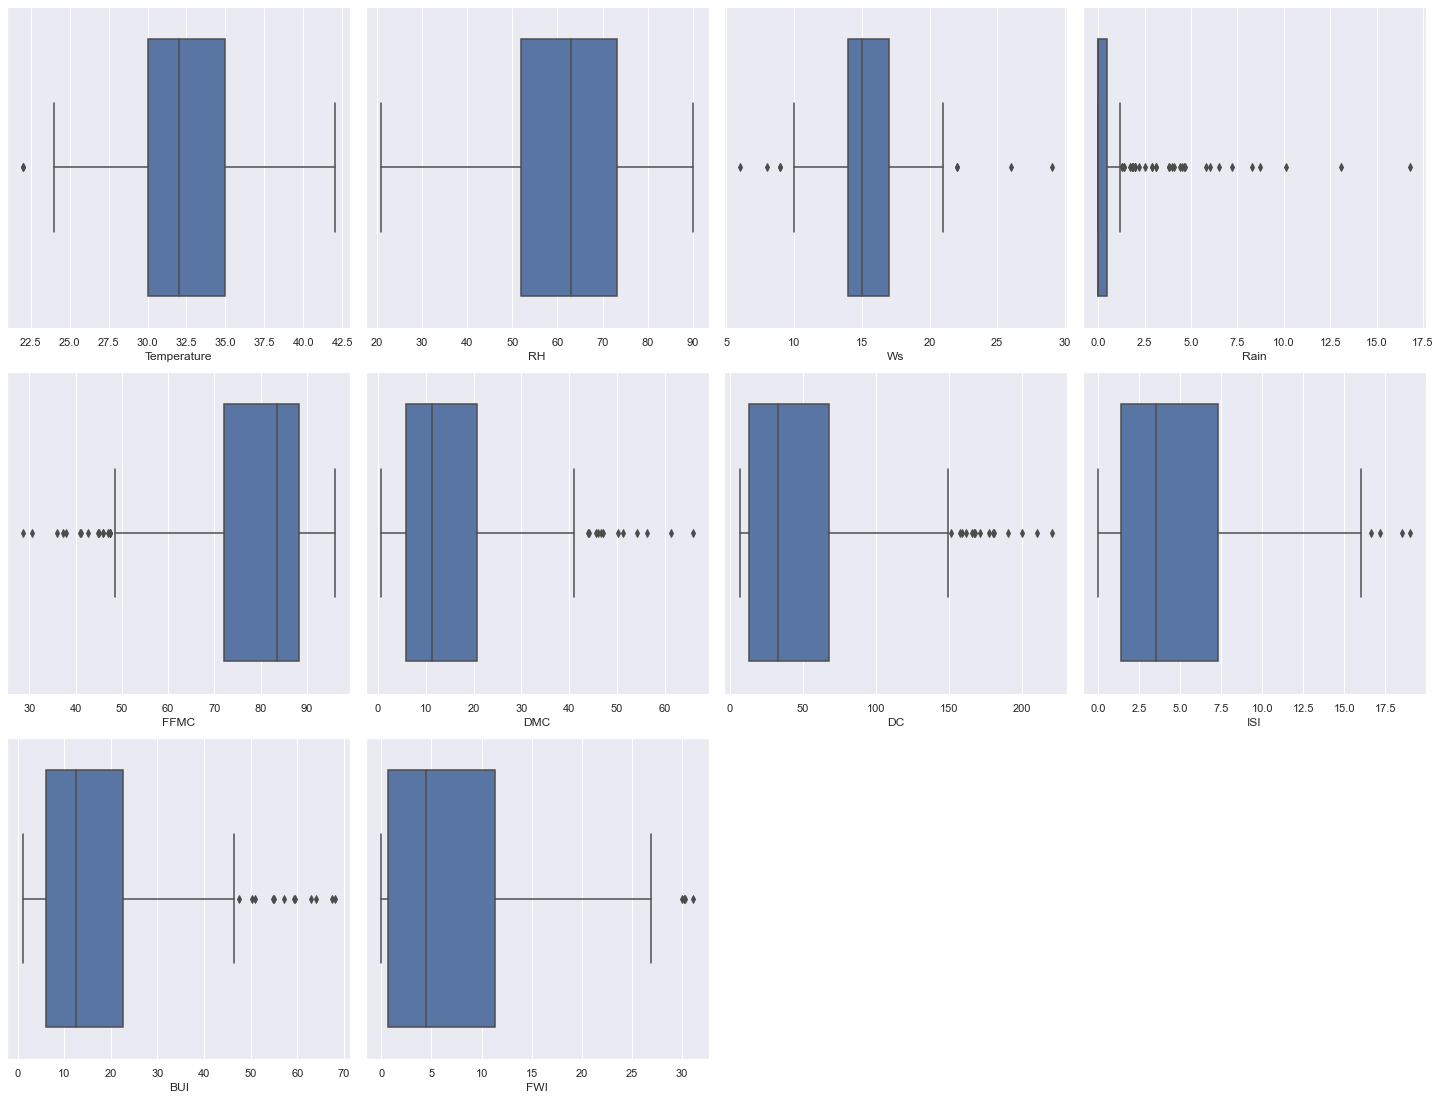

In [56]:
# checking outliers using boxplot

rows = 4
cols = 4
fig = plt.figure(figsize=(cols*5, rows*5))

for i, col in enumerate(trim_df.drop(['region', 'Classes'], axis=1).columns):
    ax= fig.add_subplot(rows,cols,i+1)
    sns.boxplot(x =col, data=df)
fig.tight_layout()
plt.show()

In [57]:
# function for finding outliers using IQR

def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers

### Train Test split

In [59]:
trim_df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,1
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,0,1
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,0,1


In [64]:
x = trim_df.drop('Classes', axis=1) # Independet Feature
y = trim_df['Classes'] # Dependent Feature

In [65]:
from sklearn.model_selection import train_test_split
# Split into training and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state=42)

In [66]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((154, 11), (77, 11), (154,), (77,))

## Standerdize data

In [72]:
from sklearn.preprocessing import StandardScaler

In [73]:
scaler = StandardScaler()

In [74]:
x_train = scaler.fit_transform(x_train)

In [75]:
x_test = scaler.transform(x_test)

## Check unbalanced data

<AxesSubplot:xlabel='Classes', ylabel='count'>

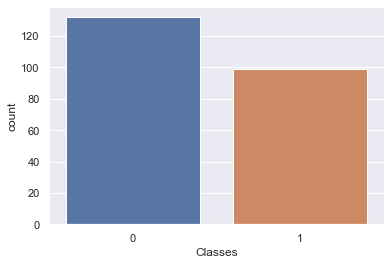

In [68]:
sns.countplot(x=trim_df.Classes)

**Data is slighly unbalanced toward not fire**

## Model building using unbalanced data

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
unbalanced_log_reg = LogisticRegression(random_state=42)

In [78]:
unbalanced_log_reg.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [79]:
unbalanced_pred = unbalanced_log_reg.predict(x_test)

In [81]:
unbalanced_pred

array([0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0])

In [83]:
print("cofficients-->", unbalanced_log_reg.coef_)
print("Intercept-->", unbalanced_log_reg.intercept_)

cofficients--> [[ 0.02024177 -0.40327147 -0.09816821 -0.13219332 -2.46673316  0.25514204
   0.08402369 -2.22904414 -0.1310529  -1.89106494  0.04360636]]
Intercept--> [-1.14391077]


In [95]:
from sklearn.metrics import precision_score, confusion_matrix, roc_auc_score, recall_score, fbeta_score, accuracy_score

In [86]:
# confusion matrix

confusion_matrix(unbalanced_pred, y_test)

array([[47,  1],
       [ 2, 27]], dtype=int64)

In [94]:
print("precision score ------> ", precision_score(unbalanced_pred, y_test))
print("recall score ----------> ", recall_score(unbalanced_pred, y_test))
print("f beta score ------------> ", fbeta_score(unbalanced_pred, y_test, beta=1))

precision score ------>  0.9642857142857143
recall score ---------->  0.9310344827586207
f beta score ------------>  0.9473684210526316


## Handle the unbalanced dataset

### oversample the data using SMOTE

In [98]:
from imblearn.over_sampling import SMOTE
from collections import Counter


smote = SMOTE() 

# fit and resample
x_smote , y_smote = smote.fit_resample(x_train, y_train)

In [100]:
print('Original dataset shape', Counter(y_train))
print('Resample dataset shape', Counter(y_smote))

Original dataset shape Counter({0: 83, 1: 71})
Resample dataset shape Counter({0: 83, 1: 83})


<AxesSubplot:xlabel='Classes', ylabel='count'>

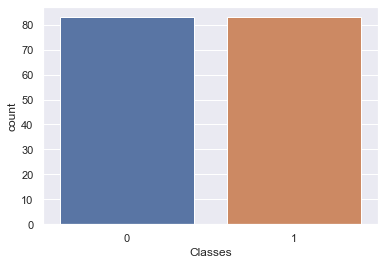

In [101]:
sns.countplot(x = y_smote)

<AxesSubplot:xlabel='Classes', ylabel='count'>

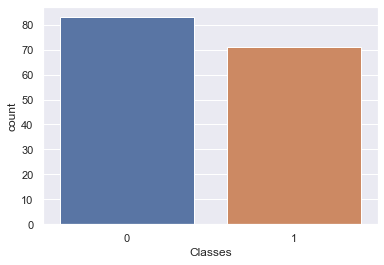

In [103]:
sns.countplot(x=y_train)

## Model building on balanced dataset

In [104]:
balanced_log_reg = LogisticRegression(random_state=42)

In [108]:
balanced_log_reg.fit(x_smote, y_smote)

LogisticRegression(random_state=42)

In [109]:
balanced_pred = unbalanced_log_reg.predict(x_test)

In [110]:
print("cofficients-->", balanced_log_reg.coef_)
print("Intercept-->", balanced_log_reg.intercept_)

cofficients--> [[ 0.03715187 -0.41681663 -0.14135182 -0.12183291 -2.5519972   0.25935281
   0.0597809  -2.27125952 -0.14758223 -1.92051078  0.06628212]]
Intercept--> [-1.11721736]


In [111]:
print("accuracy ----------> ", accuracy_score(balanced_pred, y_test))
print("precision score ------> ", precision_score(balanced_pred, y_test))
print("recall score ----------> ", recall_score(balanced_pred, y_test))
print("f beta score ------------> ", fbeta_score(balanced_pred, y_test, beta=1))

accuracy ---------->  0.948051948051948
precision score ------>  0.9642857142857143
recall score ---------->  0.9
f beta score ------------>  0.9310344827586207
